In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

1.13.1


In [28]:
df=pd.read_csv("dataset/student_scores2.csv")
df.head()

,Hours,IQ,Scores,Pass
0,2.3,80,18,0
1,5.0,80,45,1
2,3.2,70,25,0
3,8.5,90,72,1
4,3.5,70,30,0


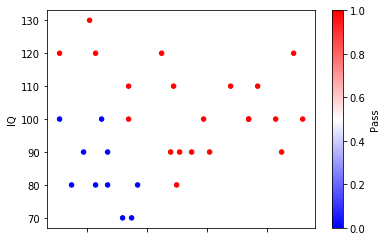

In [29]:
df.plot.scatter(x='Hours',y='IQ',c='Pass',colormap='bwr')
plt.xlabel('Hours')
plt.ylabel('IQ')
plt.show()

In [30]:
X=df.drop(["Pass","Scores"],axis=1).values
y=df["Pass"].values.reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
model = keras.Sequential([
    keras.layers.Dense(3,input_shape=(2,),activation=tf.nn.relu,name="hidden_layer"),
    keras.layers.Dense(1,activation=tf.nn.sigmoid,name="output_layer")
])
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 3)                 9         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train,y_train,epochs=100,batch_size=1,verbose=1)

Epoch 1/100
24/24 [==============================] - 0s 15ms/sample - loss: 0.9560 - acc: 0.2083
Epoch 2/100
24/24 [==============================] - 0s 6ms/sample - loss: 0.9408 - acc: 0.2917
Epoch 3/100
24/24 [==============================] - 0s 6ms/sample - loss: 0.9284 - acc: 0.3750
Epoch 4/100
24/24 [==============================] - 0s 4ms/sample - loss: 0.9148 - acc: 0.3750
Epoch 5/100
24/24 [==============================] - 0s 5ms/sample - loss: 0.9034 - acc: 0.3750
Epoch 6/100
24/24 [==============================] - 0s 4ms/sample - loss: 0.8915 - acc: 0.4167
Epoch 7/100
24/24 [==============================] - 0s 6ms/sample - loss: 0.8803 - acc: 0.4583
Epoch 8/100
24/24 [==============================] - 0s 6ms/sample - loss: 0.8702 - acc: 0.4583
Epoch 9/100
24/24 [==============================] - 0s 6ms/sample - loss: 0.8595 - acc: 0.4583
Epoch 10/100
24/24 [==============================] - 0s 6ms/sample - loss: 0.8490 - acc: 0.4583
Epoch 11/100
24/24 [==================

24/24 [==============================] - 0s 7ms/sample - loss: 0.4438 - acc: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 8ms/sample - loss: 0.4402 - acc: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 6ms/sample - loss: 0.4365 - acc: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 14ms/sample - loss: 0.4329 - acc: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 6ms/sample - loss: 0.4296 - acc: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 5ms/sample - loss: 0.4262 - acc: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 8ms/sample - loss: 0.4228 - acc: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 7ms/sample - loss: 0.4201 - acc: 1.0000
Epoch 90/100
24/24 [==============================] - 1s 21ms/sample - loss: 0.4163 - acc: 1.00000s - loss: 0.3995 - acc: 1.000 - ETA: 0s - loss: 0.3652 - acc: 
Epoch 91/100
24/24 [==============================] - 0s 6ms/sample - loss:

In [35]:
y_prediction = model.predict(X_test)

In [36]:
y_prediction,y_test

(array([[0.693223  ],
        [0.46283272],
        [0.6606226 ],
        [0.14314778],
        [0.31466225],
        [0.22052345],
        [0.693223  ]], dtype=float32), array([[1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1]]))